#### AAYUSH GOYAL
#### EE18BTECH11001
#### Assignment 3

In [15]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from astroML.resample import bootstrap
from astroML.stats import median_sigmaG
from scipy.stats import norm
import scipy.stats as stats
from astroML.plotting import setup_text_plots

### Problem 1

In [5]:
#This code is a suitably modified version of the one provided in astroML book
samples = 1000
bootstrap_samples = 10000
np.random.seed(123)
data = norm(0, 1).rvs(samples) 
median, sigmaG = bootstrap(data, bootstrap_samples, median_sigmaG, kwargs = dict(axis=1))
x = np.linspace(-2, 2, 5000)
sigma = np.sqrt(np.pi/(2.0*samples))
pdf = norm(np.mean(median), sigma).pdf(x)

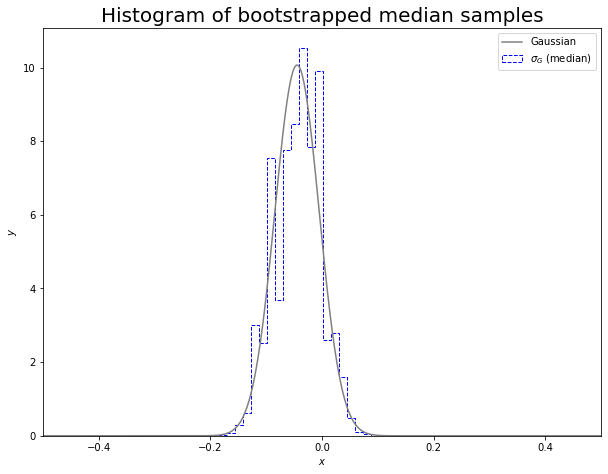

In [6]:
fig, ax = plt.subplots(figsize=(10, 7.5))
ax.hist(median, bins=20, density=True, histtype='step', color='blue', ls='dashed', 
        label=r'$\sigma_G\ {\rm (median)}$')
ax.plot(x, pdf, color='gray', label='Gaussian')
ax.set_xlim(-0.5, 0.5)
plt.title('Histogram of bootstrapped median samples', size=20)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.legend()
plt.show()

### QUESTION 2

In [8]:
Data = '''5 203 495 21 5 -0.33
6 58 173 15 9 0.67
7 210 479 27 4 -0.02
8 202 504 14 4 -0.05
9 198 510 30 11 -0.84
10 158 416 16 7 -0.69
11 165 393 14 5 0.30
12 201 442 25 5 -0.46
13 157 317 52 5 -0.03
14 131 311 16 6 0.50
15 166 400 34 6 0.73
16 160 337 31 5 -0.52
17 186 423 42 9 0.90
18 125 334 26 8 0.40
19 218 533 16 6 -0.78
20 146 344 22 5 -0.56'''


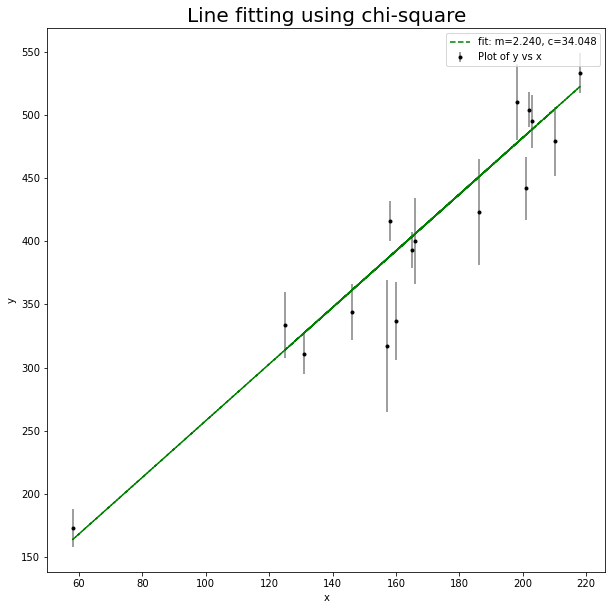

In [13]:
Arr = np.fromstring(Data,sep='\n')
x = Arr[1::6]
y = Arr[2::6]
sigma = Arr[3::6]
val = np.array([0, 0])
fig, ax = plt.subplots(figsize=(10,10))
ax.errorbar(x,y, sigma , fmt='.k', ecolor='gray', label='Plot of y vs x')
plt.title('Line fitting using chi-square', size=20)
def func(x, m, c):
    return m*x + c

popt, pcov = curve_fit(func, x, y,val, sigma)
plt.plot(x, func(x, *popt), 'g--',label='fit: m=%5.3f, c=%5.3f' % tuple(popt))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Problem 3

In [18]:
DOF = 49
X2 = np.array ([ 0.96 , 0.24 , 3.84 , 2.85 ]) * DOF
pvals = []
for i in range(4) :
    pvals.append(stats.chi2(DOF).sf(X2[i]))
print(" P-Values: " , pvals)

 P-Values:  [0.5529264339960217, 0.9999999917009567, 3.477504685373815e-18, 1.2107295923765585e-10]
